<AxesSubplot:xlabel='Date'>

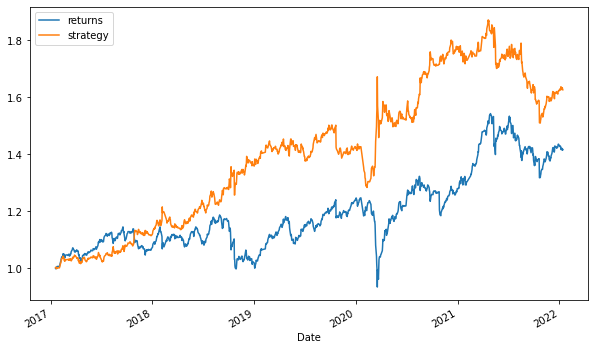

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv(r'C:\Users\npc94\OneDrive\桌面\0056.TW.csv',index_col=0,parse_dates=True)

data['returns'] = np.log(data['Close']/data['Close'].shift(1))
data['position']=np.sign(data['returns'])
data['strategy']=data['position'].shift(1)*data['returns']
data[['returns','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))

